## Preparing notebook

In [1]:
! pip install numpy -upgrade
! pip install -U scikit-fuzzy


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | / - done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=8ff56d95d27febfbd8594f352612acb20c1fe5e9a7a338ba3f125f2e0f438893
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## Import libraries

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Create the universe of discourse for each input and output variable

In [3]:
ux = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'ux')  # Utilization of renewable energy sources
bx = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'bx')  # Consumption of brown energy sources
fx = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'fx')  # Electricity price of the respective location
sx = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'sx')  # Processor speed
lx = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'lx')  # Assigned load at the data center

In [4]:
suitability = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'suitability')  # Suitability of the data center

## Define the membership functions for each variable

In [5]:
ux.automf(3)  # Low, Medium, High
bx.automf(3)  # Low, Medium, High
fx.automf(3)  # Low, Medium, High
sx.automf(3)  # Low, Medium, High
lx.automf(3)  # Low, Medium, High

suitability.automf(5)  # Very Low, Low, Medium, High, Very High

## To better understand the membership functions, we plot them

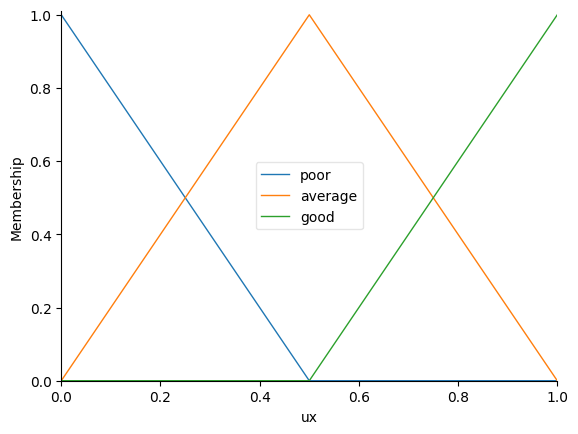

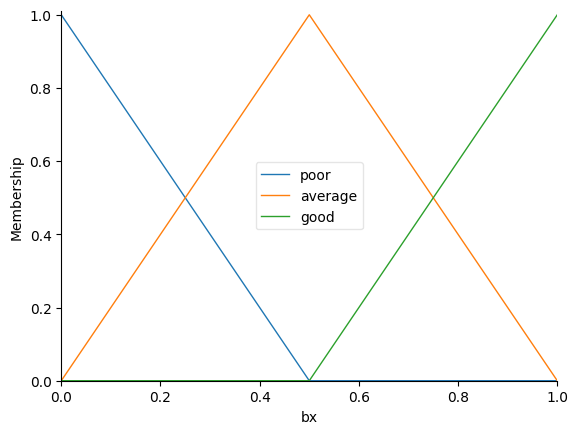

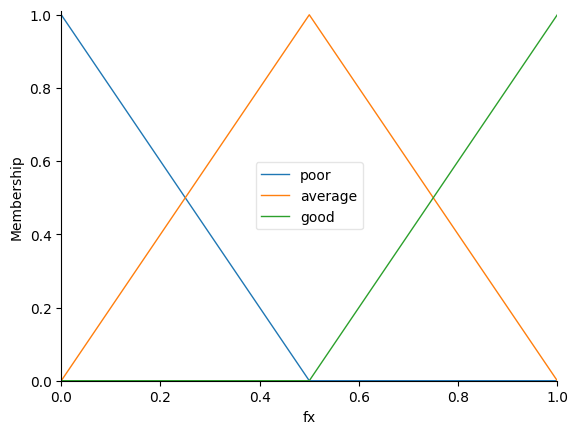

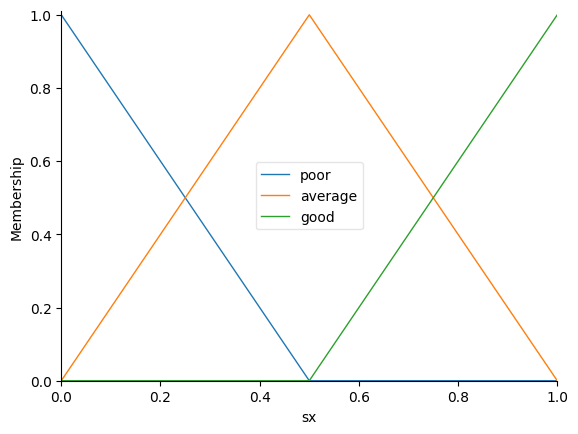

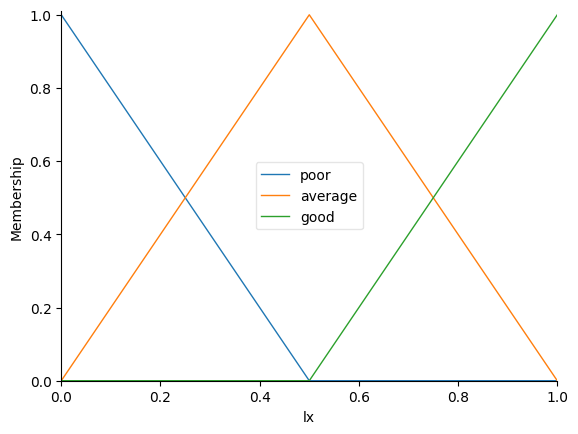

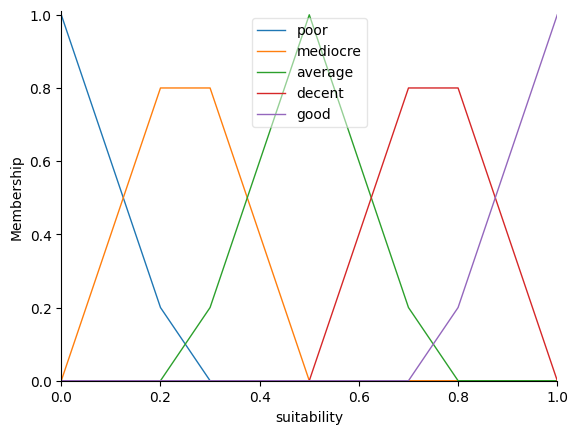

In [6]:
ux.view()
bx.view()
fx.view()
sx.view()
lx.view()
suitability.view()

## Define the fuzzy rules

### Document fuzzy values are replaced by the following symbols in this implementation
#### For inputs :
- Low --> poor
- Mid --> average
- High --> good
#### For outputs :
- Very Low --> poor
- Low --> mediocre
- Mid --> average
- High --> decent
- Very High --> good

In [7]:
rule1 = ctrl.Rule(ux['poor'] & bx['poor'] & fx['poor'] & sx['good'] & lx['poor'], suitability['good'])
rule2 = ctrl.Rule(ux['poor'] & bx['poor'] & fx['average'] & sx['poor'] & lx['good'], suitability['average'])
rule3 = ctrl.Rule(ux['poor'] & bx['good'] & fx['poor'] & sx['good'] & lx['poor'], suitability['decent'])
rule4 = ctrl.Rule(ux['poor'] & bx['good'] & fx['average'] & sx['poor'] & lx['good'], suitability['average'])

rule5 = ctrl.Rule(ux['average'] & bx['poor'] & fx['poor'] & sx['good'] & lx['poor'], suitability['decent'])
rule6 = ctrl.Rule(ux['average'] & bx['poor'] & fx['average'] & sx['poor'] & lx['good'], suitability['average'])
rule7 = ctrl.Rule(ux['average'] & bx['good'] & fx['average'] & sx['good'] & lx['poor'], suitability['average'])
rule8 = ctrl.Rule(ux['average'] & bx['good'] & fx['good'] & sx['poor'] & lx['good'], suitability['mediocre'])

rule9 = ctrl.Rule(ux['good'] & bx['poor'] & fx['poor'] & sx['good'] & lx['poor'], suitability['average'])
rule10 = ctrl.Rule(ux['good'] & bx['poor'] & fx['poor'] & sx['poor'] & lx['good'], suitability['mediocre'])
rule11 = ctrl.Rule(ux['good'] & bx['poor'] & fx['average'] & sx['good'] & lx['poor'], suitability['average'])
rule12 = ctrl.Rule(ux['good'] & bx['poor'] & fx['average'] & sx['poor'] & lx['good'], suitability['mediocre'])
rule13 = ctrl.Rule(ux['good'] & bx['poor'] & fx['good'] & sx['good'] & lx['poor'], suitability['mediocre'])
rule14 = ctrl.Rule(ux['good'] & bx['poor'] & fx['good'] & sx['poor'] & lx['good'], suitability['mediocre'])
rule15 = ctrl.Rule(ux['good'] & bx['good'] & fx['poor'] & sx['good'] & lx['poor'], suitability['average'])
rule16 = ctrl.Rule(ux['good'] & bx['good'] & fx['poor'] & sx['poor'] & lx['good'], suitability['mediocre'])
rule17 = ctrl.Rule(ux['good'] & bx['good'] & fx['average'] & sx['good'] & lx['poor'], suitability['mediocre'])
rule18 = ctrl.Rule(ux['good'] & bx['good'] & fx['average'] & sx['poor'] & lx['good'], suitability['mediocre'])
rule19 = ctrl.Rule(ux['good'] & bx['good'] & fx['good'] & sx['good'] & lx['poor'], suitability['mediocre'])
rule20 = ctrl.Rule(ux['good'] & bx['good'] & fx['good'] & sx['poor'] & lx['good'], suitability['poor'])
rules = [
    rule1, rule2, rule3, rule4,
    rule5, rule6, rule7, rule8,
    rule9, rule10, rule11, rule12,
    rule13, rule14, rule15, rule16,
    rule17, rule18, rule19, rule20
]

### Show some rule graph

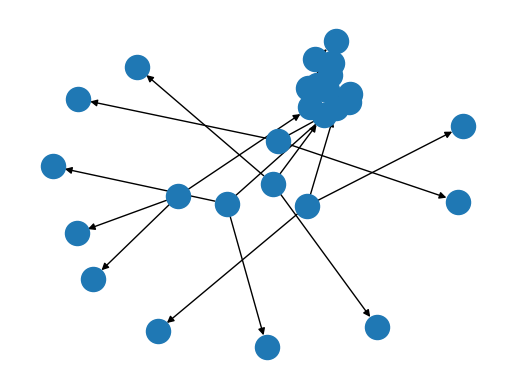

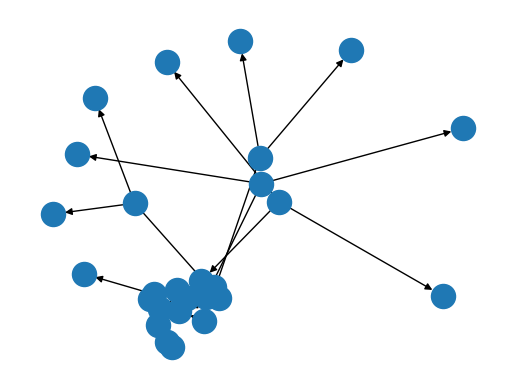

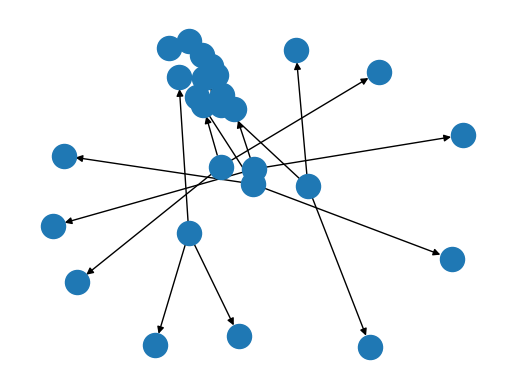

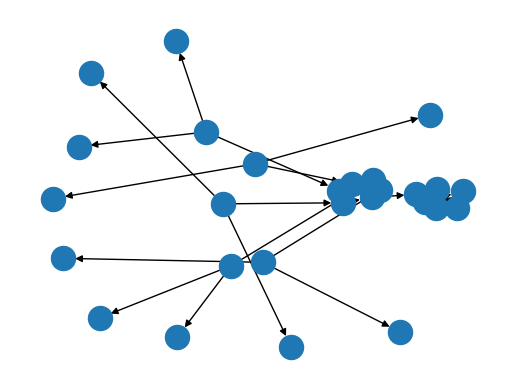

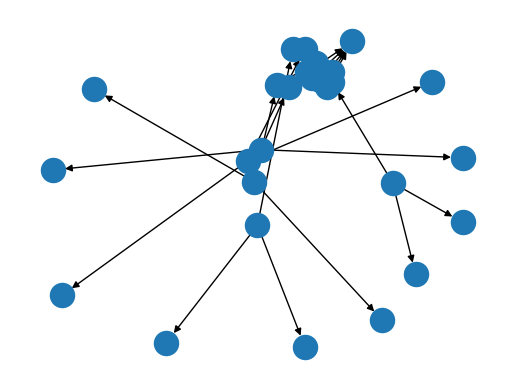

In [8]:
for i in np.random.randint(0, 20, 5):
    rules[i].view()

## Create the fuzzy control system

In [9]:
fuzzy_control_system = ctrl.ControlSystem(rules)
fuzzy_control_simulation = ctrl.ControlSystemSimulation(fuzzy_control_system)

## Test

The suitability for ux=0.1, bx=0.13, fx0.29, sx0.7, lx0.1 inputs is: 0.8025641025641025
The suitability for ux=0.86, bx=0.89, fx0.75, sx0.2, lx0.6 inputs is: 0.23771929824561408
The suitability for ux=0.59, bx=0.37, fx0.54, sx0.2, lx0.8 inputs is: 0.40956568119475767
The suitability for ux=0.1, bx=0.2, fx0.5, sx0.2, lx0.9 inputs is: 0.5


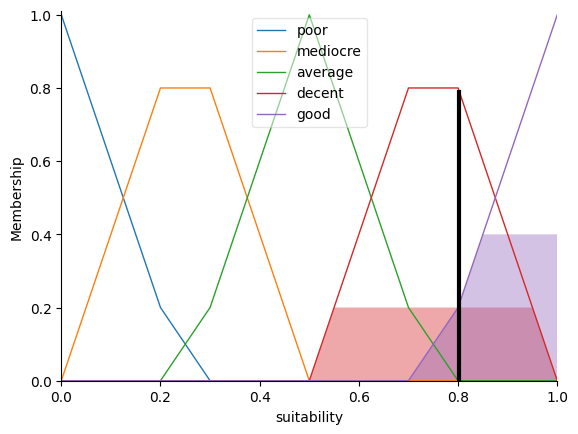

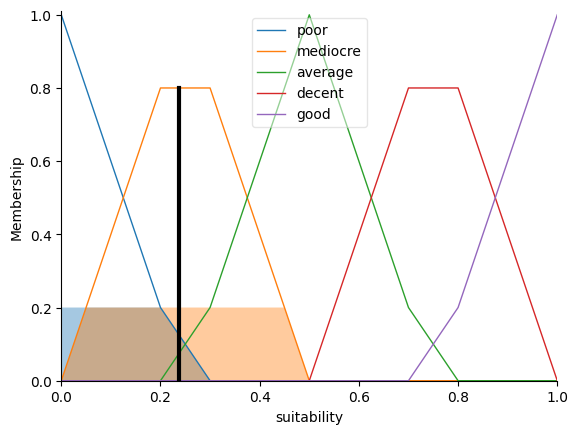

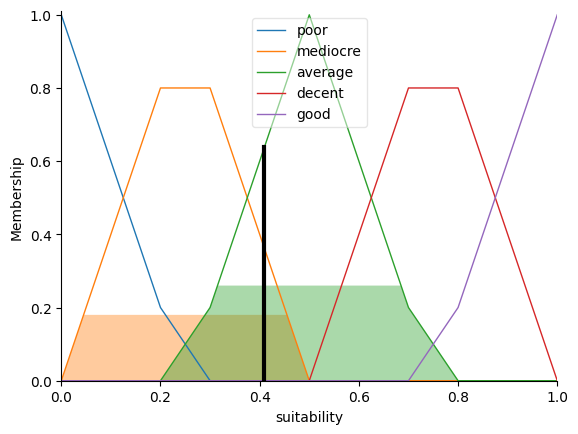

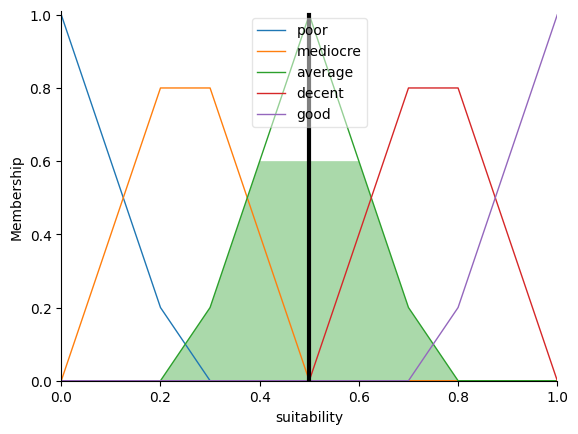

In [10]:
test_values = [
    [0.10, 0.13, 0.29, 0.7, 0.1],
    [0.86, 0.89, 0.75, 0.2, 0.6],
    [0.59, 0.37, 0.54, 0.2, 0.8],
    [0.1, 0.2, 0.5, 0.2, 0.9],
]
for row in test_values:
    fuzzy_control_simulation.input['ux'] = row[0]
    fuzzy_control_simulation.input['bx'] = row[1]
    fuzzy_control_simulation.input['fx'] = row[2]
    fuzzy_control_simulation.input['sx'] = row[3]
    fuzzy_control_simulation.input['lx'] = row[4]
    fuzzy_control_simulation.compute()
    print('The suitability for ux={}, bx={}, fx{}, sx{}, lx{} inputs is: {}'.format(row[0], row[1], row[2], row[3], row[4], fuzzy_control_simulation.output['suitability']))
    suitability.view(sim=fuzzy_control_simulation)